# **Aim**

The aim of this analysis is to leverage data to identify strategies that maximize revenue for "Feel Like Home" (FLH) during the post-COVID travel surge. This includes targeting the right neighborhoods, pricing strategies, identifying successful property types, understanding customer preferences, optimizing host attributes, and boosting traction for less popular properties.


#**Business Objectives**

Target High-Demand Neighborhoods:
* Objective: Identify and prioritize neighborhoods with high demand.
* Approach: Analyze neighbourhood groups and its neighbourhoods.

Optimize Pricing Strategies:

* Objective: Determine the optimal pricing ranges preferred by customers.
* Approach: Conduct pricing analysis.

Identify Successful Property Types:

* Objective: Understand which property types are most and least successful to focus on high-performing ones and improve the others.
* Approach: Analyze room types, number of reviews given by customers.

Understand Customer Preferences:

* Objective: Discover key factors that customers prioritize in their stays to enhance property listings and services.
* Approach: Analyze customer reviews, location, types of rooms.

Enhance Host Attributes:

* Objective: Identify host attributes that contribute to higher bookings and customer satisfaction.
* Approach: Examine host_attributes such as number of listings, reviews.

Boost Traction for Unpopular Properties:
* Objective: Develop strategies to increase visibility and bookings for properties with lower demand.
* Approach: Implement targeted marketing campaigns, offer discounts to attract more customers.

# **Data Description**
This dataset has  48895 rows and  16 columns.

The 16 features are:
1. id: Unique identifier for the listing.
2. name: Name of the listing.
3. host_id: Unique identifier for the host.
4. host_name: Name of the host.
5. neighbourhood_group: Larger area the listing is located in.
6. neighbourhood: Specific area the listing is located in.
7. latitude: Latitude coordinate of the listing.
8. longitude: Longitude coordinate of the listing.
9. room_type: Type of room being offered (e.g., Entire home/apt, Private room).
10. price: Price per night in the listing's currency.
11. minimum_nights: Minimum number of nights required for booking.
12. number_of_reviews: Total number of reviews the listing has received.
13. last_review: Date of the last review received.
14. reviews_per_month: Number of reviews the listing receives per month.
15. calculated_host_listings_count: Number of listings the host has.
16. availability_365: Number of days the listing is available for booking in a year.



#**Notebook Contents :**
1. Dataset Information

  Observations

2. Exploratory Data Analysis (EDA)

      2.1. Automated EDA(Sweetviz)
      
      2.2. Manually performing EDA with Observations

      Handling missing values

      Univariate analysis
      1. id
      2. host_id
      3. neighbourhood_group
      4. neighbourhood
      5. room_type
      6. number of reviews
      7. minimum nights
      8.calculated_host_listings
      9.availablity 365
      
      Bivariate analysis
      1. Grouping by neighbourhood_group and neighbourhoods
      2. average of (prices per neighbourhood_group and room types)
      3. Count of Room Types per Neighbourhood Group
      4. Columns wrt price
      5. number of reviews wrt neighbourhoods
host attributes and calculate the average price and number of reviews
      6.Correlation

Q1 What are the neighborhoods that FLH needs to target?

Q2 What are the pricing ranges preferred by FLH customers?

Q3 What are the types of properties that are most successful and least successful for FLH?

Q4 What are customers looking for most in their stays with FLH?

Q5 What attributes do the hosts have that FLH should target to add to their service to increase revenue?

Q6 How to get unpopular properties more traction?

Conclusion

CONNECTING MYSQL


# 1. Dataset Information


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('FLH.csv')

In [3]:
#reading the data
df.head() #first 5 rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
print('This dataset has',df.shape[0],'rows and',df.shape[1],'columns')

This dataset has 48895 rows and 16 columns


# 2. Exploratory Data Analysis

## 2.1 Automated EDA (sweetviz)

In [6]:
#!pip install sweetviz

In [7]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)

# Save the report as an HTML file
report.show_html("FLH_EDA.html")


                                             |          | [  0%]   00:00 -> (? left)

Report FLH_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##       2.2. Manually performing EDA with Observations

In [8]:
#creating a function to create a table that has feature_names, dtype, missing values and the number of unique values
def table_insights(df):
  summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
  summary = summary.reset_index()
  summary['Feature_name'] = summary['index']
  summary = summary[['Feature_name', 'dtypes']]
  summary['Missing_values'] = df.isnull().sum().values
  summary['% of missing values'] = ((df.isnull().sum().values)/(df.isnull().count().values))
  summary['No. unique_values'] = df.nunique().values
  summary['Duplicates'] = df.duplicated().sum()

  return summary

table_insights(df)

,Feature_name,dtypes,Missing_values,% of missing values,No. unique_values,Duplicates
0,id,int64,0,0.000000,48895,0
1,name,object,16,0.000327,47896,0
2,host_id,int64,0,0.000000,37457,0
3,host_name,object,21,0.000429,11452,0
4,neighbourhood_group,object,0,0.000000,5,0
5,neighbourhood,object,0,0.000000,221,0
6,latitude,float64,0,0.000000,19048,0
7,longitude,float64,0,0.000000,14718,0
8,room_type,object,0,0.000000,3,0
9,price,int64,0,0.000000,674,0


In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
#to view the count, unique categories, most repeated category, and its frequency --- categorical columns
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23-06-2019
freq,18,417,21661,3920,25409,1413


###**Observations:**
* The dataset comprises of 48,895 rows with 16 columns.

* The columns with null values are 'name', 'host_name', 'last_review' and 'reviews_per_month', with the latter two having 10,052 null entries.

* There are no duplicate values in the dataset.

* The 'number_of_reviews','price','reviews_per_month', 'availability_365' columns seem to have outiers, but as we are only analyzing the data, I think its okay to proceed without handling the outliers.

### Handling missing values

In [11]:
# Filling null entries in name column with 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown_host_name', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna(0, inplace=True)

#checking if the null values still exist
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Univariate analysis

#### id

In [12]:
#id

print('The number of unique ids in this dataset is', df['id'].nunique())

The number of unique ids in this dataset is 48895


#### host_id

In [13]:
#host_id

print('The number of unique hosts in this dataset is', df['host_id'].nunique())

The number of unique hosts in this dataset is 37457


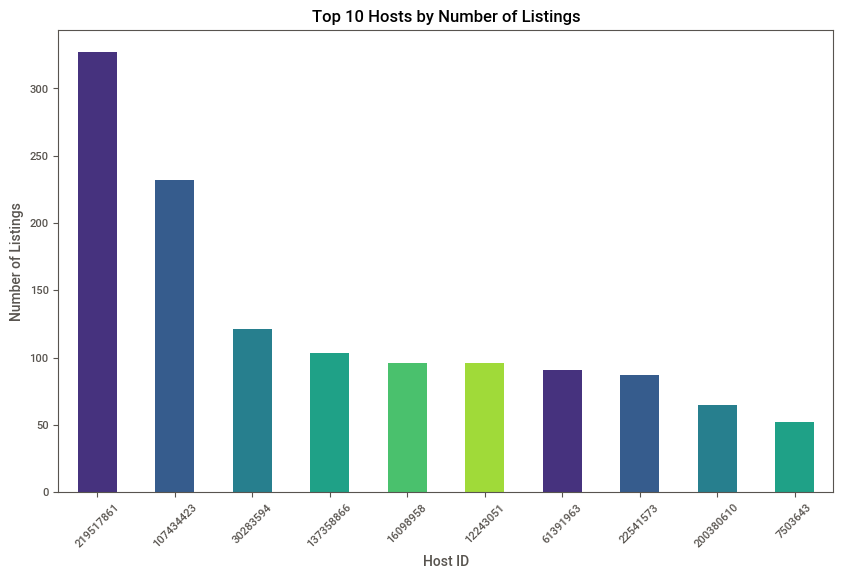

In [14]:
# The chart reveals the top 10 hosts based on the count of hosting occurrences.
host_listings_count = df['host_id'].value_counts().head(10)
host_listings_count
colors = sns.color_palette('viridis')

# Plot the top 10 hosts
plt.figure(figsize=(10, 6))
host_listings_count.plot(kind='bar', color= colors)
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)

plt.show()

* From this chart we can see that this host '219517861' has the highest number of listings.

* Identifying the top hosts is important as it can lead to collaborations, recognition, and potential incentives for these hosts. Recognizing and rewarding top hosts could encourage them to continue providing exceptional service, contributing to positive customer experiences and loyalty.

#### neighbourhood_group

In [15]:
#neighbourhood_group

print('The number of unique neighbourhood_groups in the dataset is', df['neighbourhood_group'].nunique(),
      'and the unique neighbourhood_groups are', df['neighbourhood_group'].unique())

max_number_neighbourhood = df.neighbourhood_group.value_counts()
print ('\nThe neighbourhood group with maximum number of listings is', max_number_neighbourhood.head(1))

The number of unique neighbourhood_groups in the dataset is 5 and the unique neighbourhood_groups are ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

The neighbourhood group with maximum number of listings is neighbourhood_group
Manhattan    21661
Name: count, dtype: int64


<ipython-input-16-7d7dac27187d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='neighbourhood_group', data=df, palette='viridis')


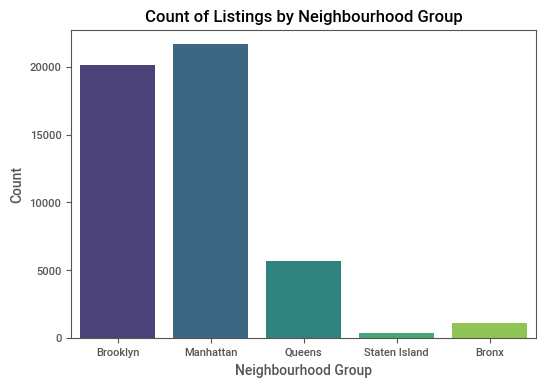

In [16]:
# Create count plot using seaborn
plt.figure(figsize=(6, 4))
plot = sns.countplot(x='neighbourhood_group', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Listings by Neighbourhood Group')

# Show plot
plt.show()

* This chart provides insights into the distribution of listings across different neighborhood groups.

* Here we can see that Manhattan has higher number of listing and Staten Island has lower number of listing.

#### neighbourhood

In [17]:
#neighbourhood

print('The number of unique neighbourhoods in the dataset is', df['neighbourhood'].nunique())

The number of unique neighbourhoods in the dataset is 221


<ipython-input-18-03a8e46f9bc3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="neighbourhood", y="count", palette="Set2", data=df_neighbourhood_top10)


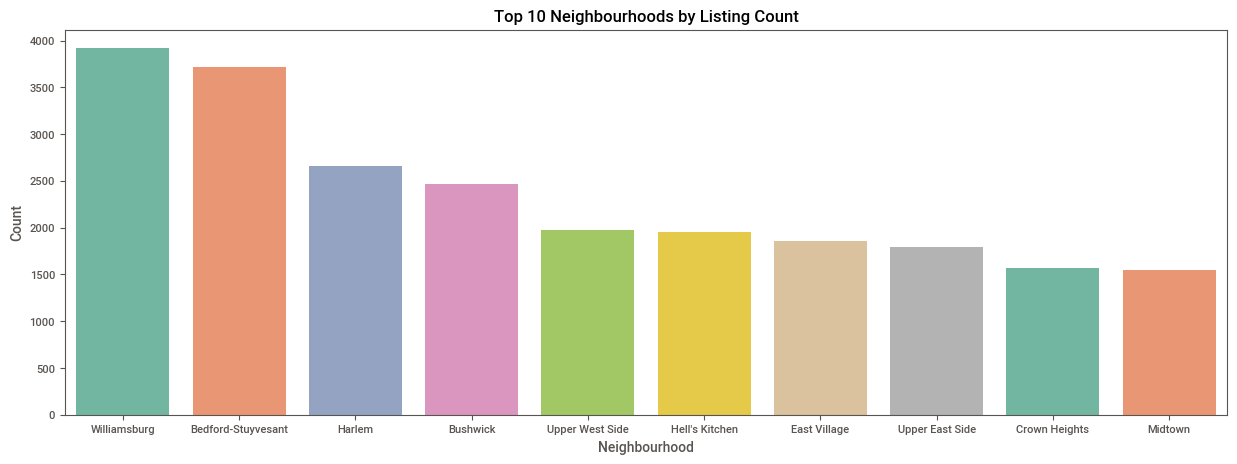

In [18]:
#top 10 listings in  the neighbourhood column
neighbourhood_top10 = df["neighbourhood"].value_counts().head(10)
df_neighbourhood_top10 = pd.DataFrame(neighbourhood_top10)
df_neighbourhood_top10 = df_neighbourhood_top10.reset_index()

# Rename the columns for clarity
df_neighbourhood_top10.columns = ['neighbourhood', 'count']

# Plot
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="neighbourhood", y="count", palette="Set2", data=df_neighbourhood_top10)
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.show()

* The chart reveals the distribution of listings across different neighbourhoods.

* We see that Williamsburg has higher number of listings followed by Bedford-Stuyvesant.

#### room_type

In [19]:
#room_type

print('The number of unique room_types in the dataset is', df['room_type'].nunique(),
      'and the unique room_types are', df['room_type'].unique())

# calculate the maximum number of listings per room_type
max_number_room_type = df.room_type.value_counts()
print ('\nThe room type with maximum number of listings is', max_number_room_type.head(1))

The number of unique room_types in the dataset is 3 and the unique room_types are ['Private room' 'Entire home/apt' 'Shared room']

The room type with maximum number of listings is room_type
Entire home/apt    25409
Name: count, dtype: int64


<ipython-input-20-503d17073980>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='room_type', data=df, palette='viridis')


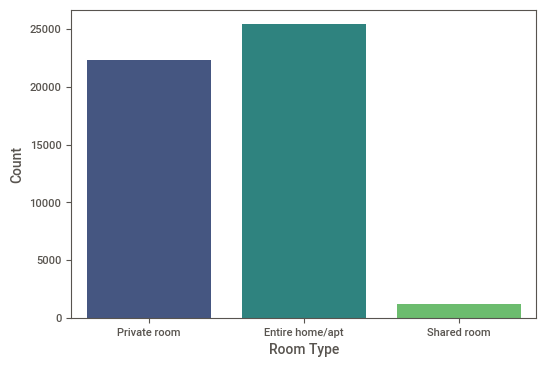

In [20]:
# Create count plot using seaborn
plt.figure(figsize=(6, 4))
plot = sns.countplot(x='room_type', data=df, palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Show plot
plt.show()

* The chart reveals the distribution of different room types in the dataset.

* Each bar represents a specific room type, and the height of the bar indicates the count (frequency) of the room type.

* Here we can see that 'Entire home/apt' Room type has higher number of frequency and 'Shared room' has lower frequency.

* Understanding distribution is benificial to highlight and promote the most popular room types.

#### number of reviews

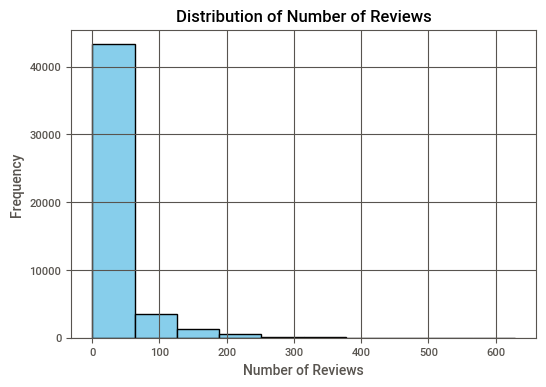

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(df['number_of_reviews'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Most listings have between 0 and 50 reviews.

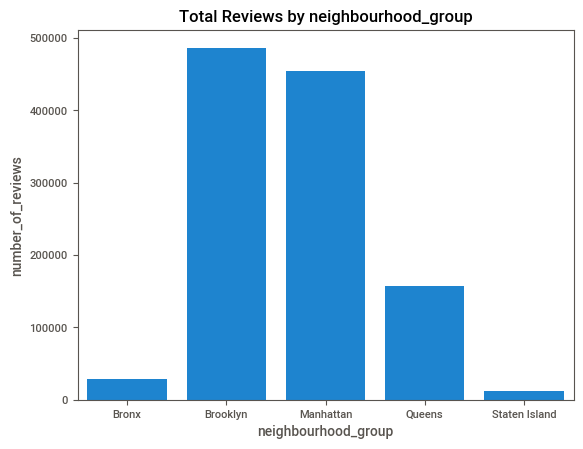

In [22]:
df_reviews = df.groupby(["neighbourhood_group"])["number_of_reviews"].sum()
df_reviews = pd.DataFrame(df_reviews)
df_reviews = df_reviews.reset_index()

sns.barplot(x="neighbourhood_group", y="number_of_reviews", data = df_reviews)
plt.title("Total Reviews by neighbourhood_group")
plt.show()

#### minimum nights

In [23]:
#minimum_nights

print(sorted(df['minimum_nights'].unique()))
df['minimum_nights'].describe()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 42, 43, 44, 45, 47, 50, 53, 55, 56, 58, 59, 60, 62, 65, 68, 70, 74, 75, 80, 85, 87, 88, 90, 91, 93, 98, 99, 100, 105, 110, 114, 115, 120, 122, 133, 134, 150, 153, 160, 175, 180, 181, 182, 183, 184, 185, 186, 198, 200, 210, 222, 225, 240, 250, 265, 270, 275, 299, 300, 354, 360, 364, 365, 366, 370, 400, 480, 500, 999, 1000, 1250]


count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

####calculated_host_listings

In [24]:
#calculated_host_listings
df['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [25]:
# Find the maximum calculated_host_listings_count
max_listings_count = df['calculated_host_listings_count'].max()

# Find the corresponding host_name for the maximum listings count
host_with_max_listings = df[df['calculated_host_listings_count'] == max_listings_count]['host_name'].iloc[0]

# Print the results
print(f"The maximum number of listings a host has is {max_listings_count}, by host {host_with_max_listings}")

The maximum number of listings a host has is 327, by host Sonder (NYC)


#### availablity 365

In [26]:
#availability_365

print('The maximum availability is',df['availability_365'].max())
print('The minimum availability is',df['availability_365'].min())
df['availability_365'].describe()

The maximum availability is 365
The minimum availability is 0


count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

### Bivariate analysis
This involves examining the relationship between two variables.

#### Grouping by neighbourhood_group and neighbourhoods


In [27]:
# Group by 'neighbourhood_group' and aggregate neighbourhoods
neighbourhood_table = df.groupby('neighbourhood_group')['neighbourhood'].agg(['unique', 'nunique']).reset_index()

# Rename columns for clarity
neighbourhood_table.columns = ['Neighbourhood Group', 'Neighbourhoods', 'Number of Unique Neighbourhoods']

# Convert unique neighbourhoods array to list for readability
neighbourhood_table['Neighbourhoods'] = neighbourhood_table['Neighbourhoods'].apply(list)

# Display the table
neighbourhood_table = pd.DataFrame(neighbourhood_table)
neighbourhood_table

,Neighbourhood Group,Neighbourhoods,Number of Unique Neighbourhoods
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb...",48
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,...",47
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He...",32
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi...",51
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor...",43


#### average of (prices per neighbourhood_group and room types)


In [28]:
#average of (prices per neighbourhood_group and room types)
avg_price_room_neighbourhood = df.groupby(['neighbourhood_group','room_type'])['price'].mean().round(2)
avg_price_room_neighbourhood = pd.DataFrame(avg_price_room_neighbourhood)
avg_price_room_neighbourhood

price
neighbourhood_group room_type              
Bronx               Entire home/apt  127.51
                    Private room      66.79
                    Shared room       59.80
Brooklyn            Entire home/apt  178.33
                    Private room      76.50
                    Shared room       50.53
Manhattan           Entire home/apt  249.24
                    Private room     116.78
                    Shared room       88.98
Queens              Entire home/apt  147.05
                    Private room      71.76
                    Shared room       69.02
Staten Island       Entire home/apt  173.85
                    Private room      62.29
                    Shared room       57.44

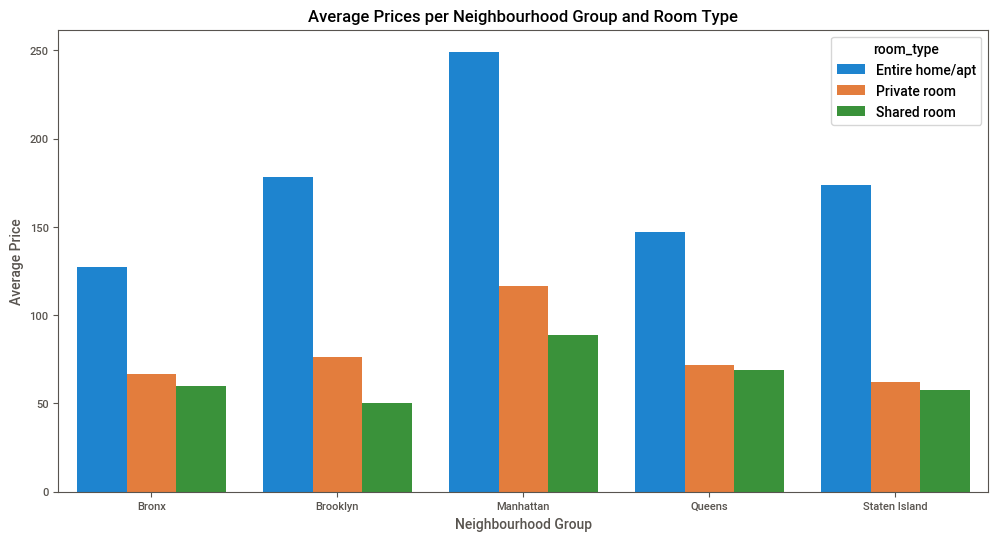

In [29]:
# Calculate average prices per neighbourhood_group and room_type
avg_price_room_neighbourhood = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().round(2).reset_index()

# Plotting the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_room_neighbourhood, x='neighbourhood_group', y='price', hue='room_type')

# Adding title and labels
plt.title('Average Prices per Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

# Display the plot
plt.show()

#### Count of Room Types per Neighbourhood Group

   neighbourhood_group        room_type  Count
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9


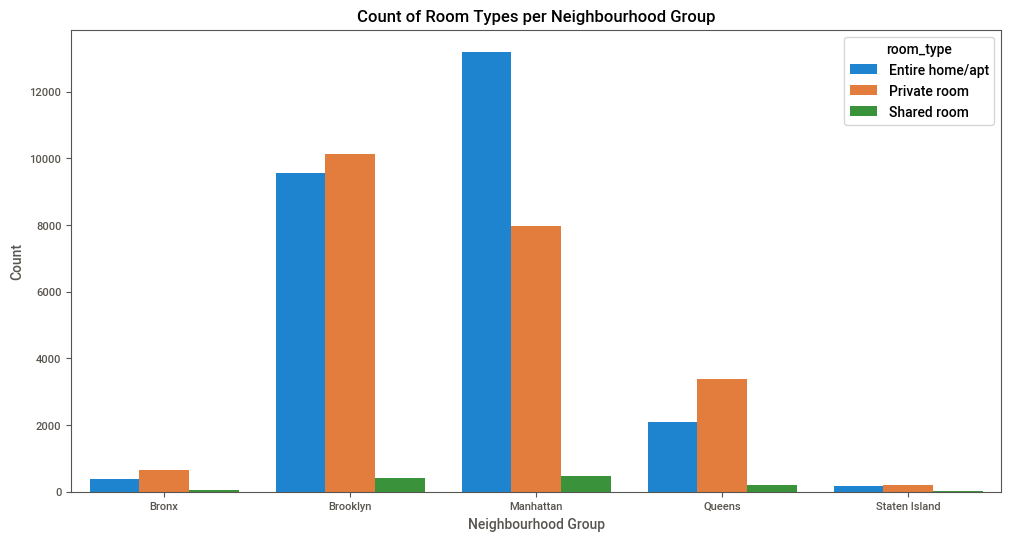

In [30]:
room_type_counts = df.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='Count')

# Display the DataFrame
print(room_type_counts)

# Plotting the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=room_type_counts, x='neighbourhood_group', y='Count', hue='room_type')

# Adding title and labels
plt.title('Count of Room Types per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')

# Display the plot
plt.show()

#### Columns wrt price

<Axes: xlabel='neighbourhood_group', ylabel='price'>

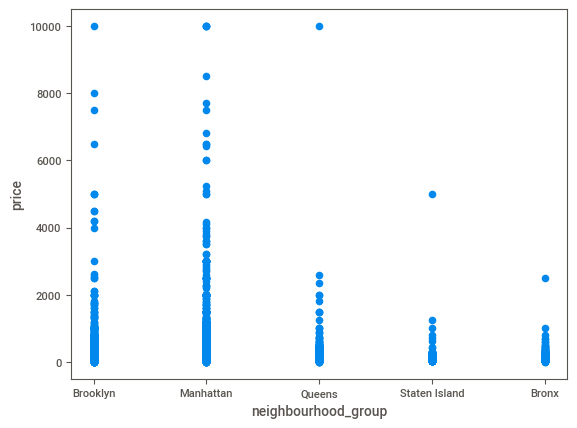

In [31]:
df.plot.scatter(x='neighbourhood_group', y='price')

In [32]:
# Grouping based on neighbourhood
bronx = df['neighbourhood_group'] == 'Bronx'
staten_island = df['neighbourhood_group'] == 'Staten Island'
queens = df['neighbourhood_group'] == 'Queens'
brooklyn = df['neighbourhood_group'] == 'Brooklyn'
manhattan = df['neighbourhood_group'] == 'Manhattan'

# Calculating the avergae price in each neighbourhood
bronx_avg = df[bronx]['price'].mean()
statenisland_avg = df[staten_island]['price'].mean()
queens_avg = df[queens]['price'].mean()
brooklyn_avg = df[brooklyn]['price'].mean()
manhattan_avg = df[manhattan]['price'].mean()


print("--- Average Price in the Neighbourhood Group ---")
print("Bronx:",bronx_avg)
print("Staten Island:",statenisland_avg)
print("Quuens:", queens_avg)
print("Brooklyn:",brooklyn_avg)
print("Manhattan:",manhattan_avg)

--- Average Price in the Neighbourhood Group ---
Bronx: 87.4967919340055
Staten Island: 114.81233243967829
Quuens: 99.51764913519237
Brooklyn: 124.38320732192598
Manhattan: 196.8758136743456


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

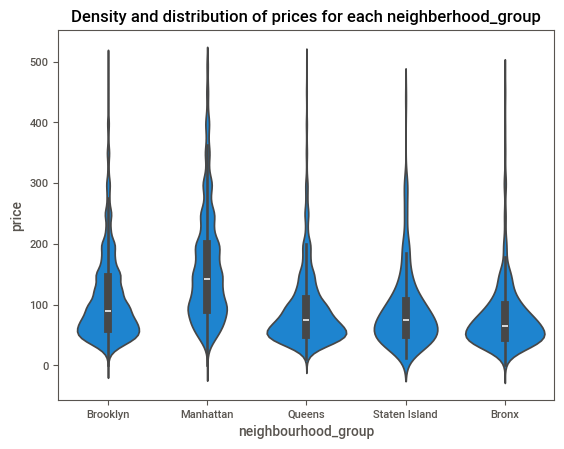

In [33]:
#creating a sub-dataframe with no extreme values / less than 500
price_below_500 =df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=price_below_500, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

* we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night.
* Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, Manhattan is one of the most expensive places in the US.


<Axes: xlabel='room_type', ylabel='price'>

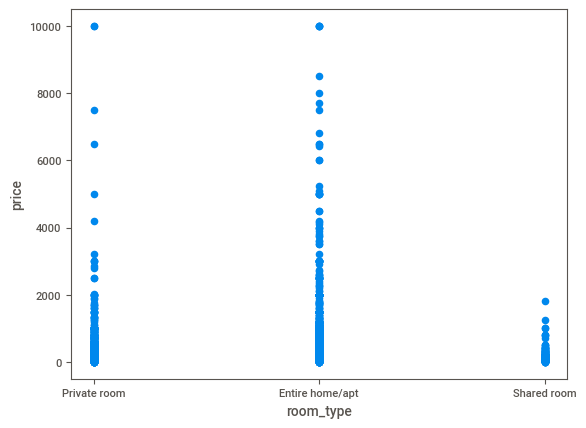

In [34]:
df.plot.scatter(x='room_type', y='price')

<Axes: xlabel='minimum_nights', ylabel='price'>

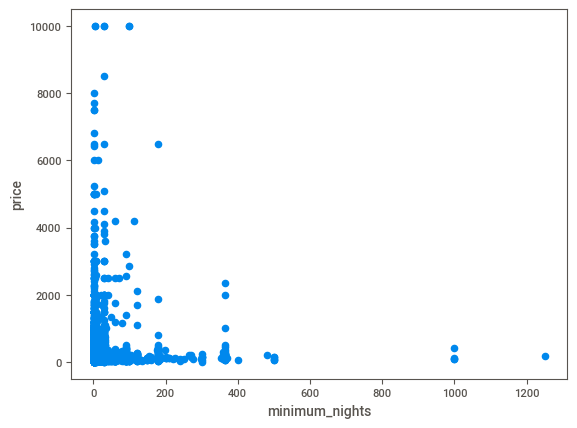

In [35]:
df.plot.scatter(x='minimum_nights', y='price')

There is a negative relationship as when we increase the minimum number of nights the price decreases.

<Axes: xlabel='number_of_reviews', ylabel='price'>

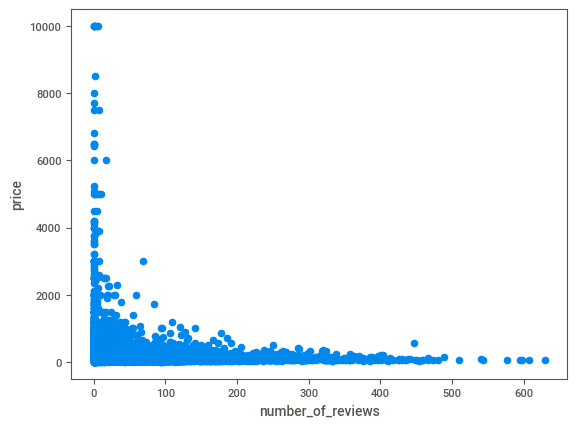

In [36]:
df.plot.scatter(x='number_of_reviews', y='price')

From above visualization we can say that most number of people like to stay in less price and their reviews are higher in those areas


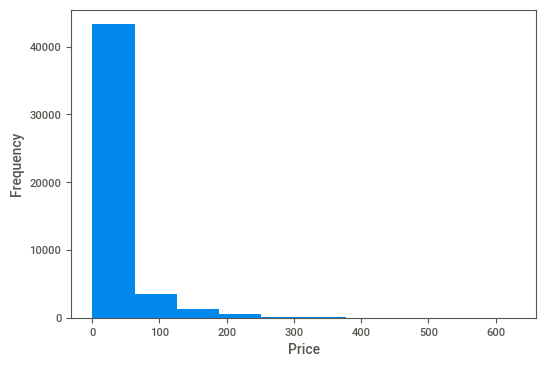

In [37]:
plt.figure(figsize=(6,4))
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")

plt.show()

Low cost rooms or in range 0-50 $ have more reviews
Lower the price, more the number of reviews

<Axes: xlabel='reviews_per_month', ylabel='price'>

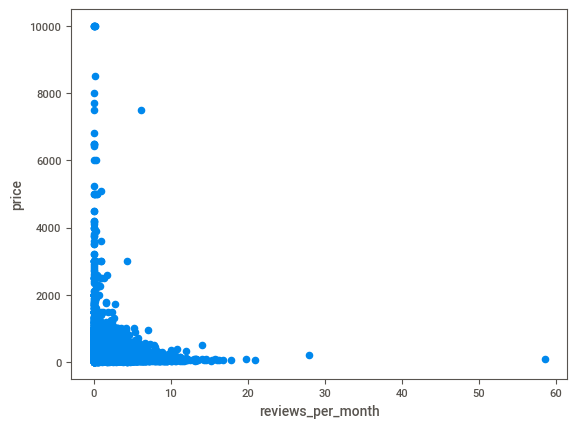

In [38]:
df.plot.scatter(x='reviews_per_month', y='price')

<Axes: xlabel='calculated_host_listings_count', ylabel='price'>

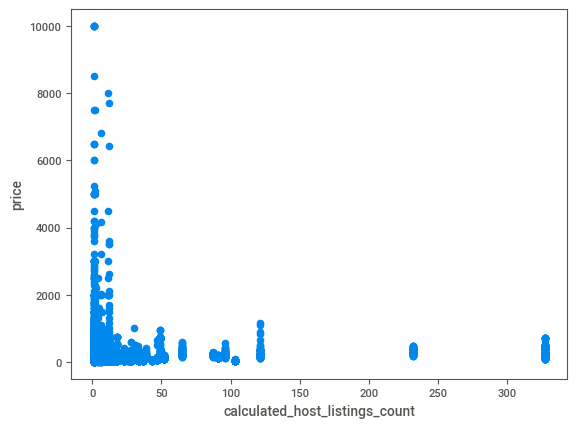

In [39]:
df.plot.scatter(x='calculated_host_listings_count', y='price')

<Axes: xlabel='availability_365', ylabel='price'>

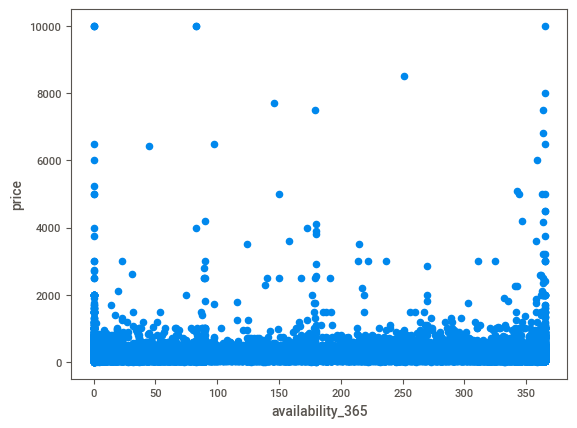

In [40]:
df.plot.scatter(x='availability_365', y='price')

#### number of reviews wrt neighbourhoods

In [41]:
neighbourhood_group_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
neighbourhood_group_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


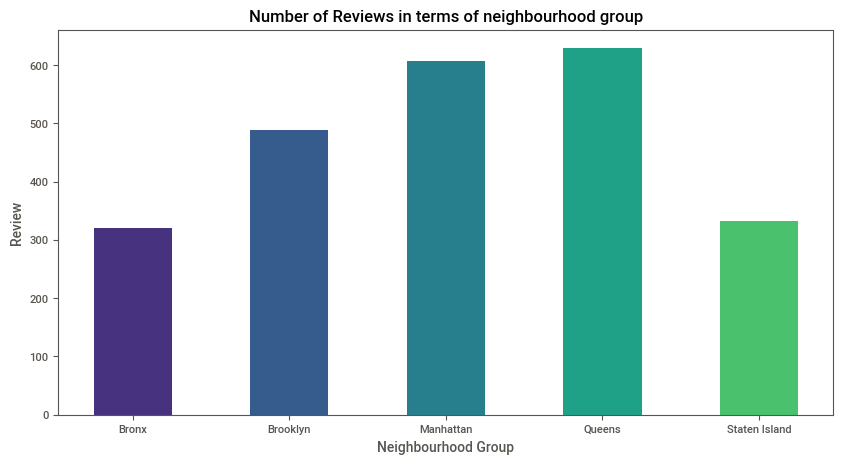

In [42]:
neighbourhood_group1 = neighbourhood_group_reviews['neighbourhood_group']
review = neighbourhood_group_reviews['number_of_reviews']
fig = plt.figure(figsize =(10,5))
colors = sns.color_palette('viridis')

plt.bar(neighbourhood_group1, review, color = colors, width =0.5)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Review')
plt.title("Number of Reviews in terms of neighbourhood group")
plt.show()

#### host attributes and calculate the average price and number of reviews

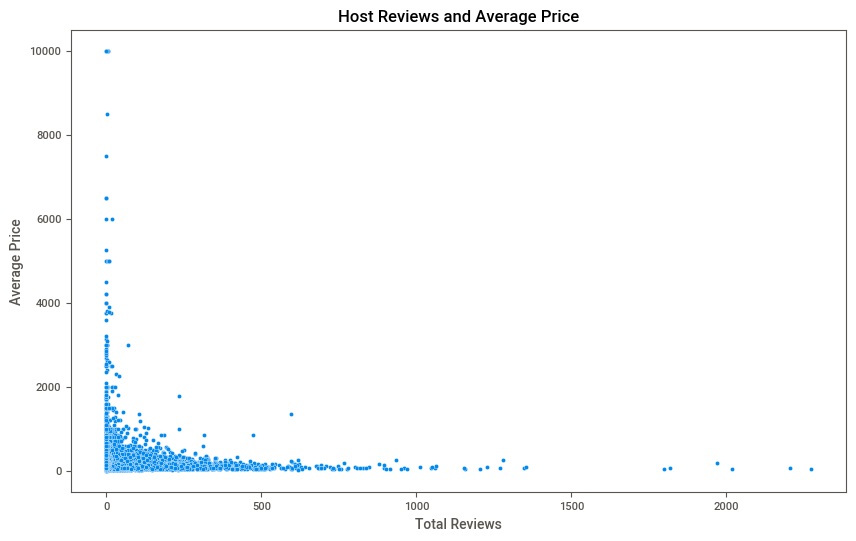

In [43]:
# Group by host attributes and calculate the average price and number of reviews
host_data = df.groupby(['host_id']).agg(
    AvgPrice=('price', 'mean'),
    TotalReviews=('number_of_reviews', 'sum')
).reset_index()

# Plotting the relationship between number of reviews and average price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalReviews', y='AvgPrice', data=host_data)
plt.title('Host Reviews and Average Price')
plt.xlabel('Total Reviews')
plt.ylabel('Average Price')
plt.show()

#### Correlation

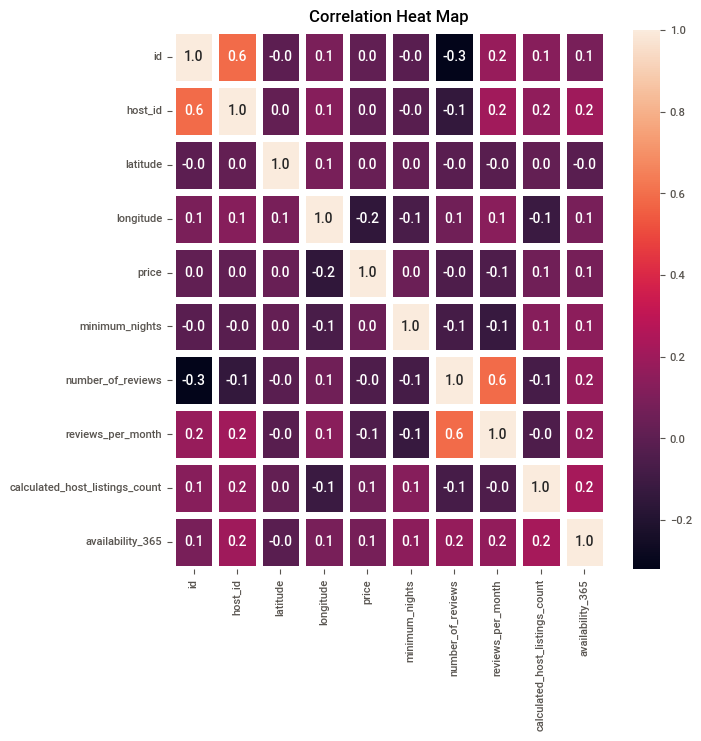

In [44]:
# Correlation Heatmap visualization code

# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')

# Use only numeric columns for correlation matrix
sns.heatmap(df[numeric_columns].corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

plt.show()

* Number of reviews and reviews per month have strong positive correlation.


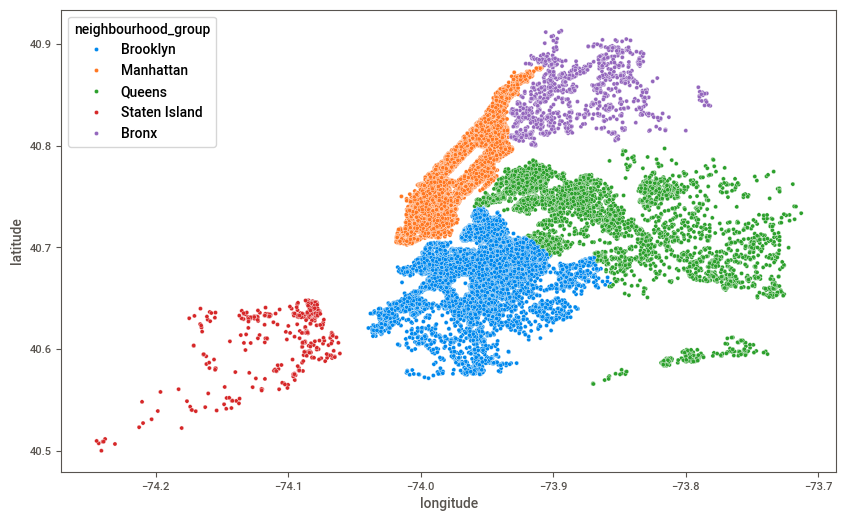

In [45]:
plt.figure(figsize=(10,6))
#sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)

plt.show()

<ipython-input-46-23a16d1cf053>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


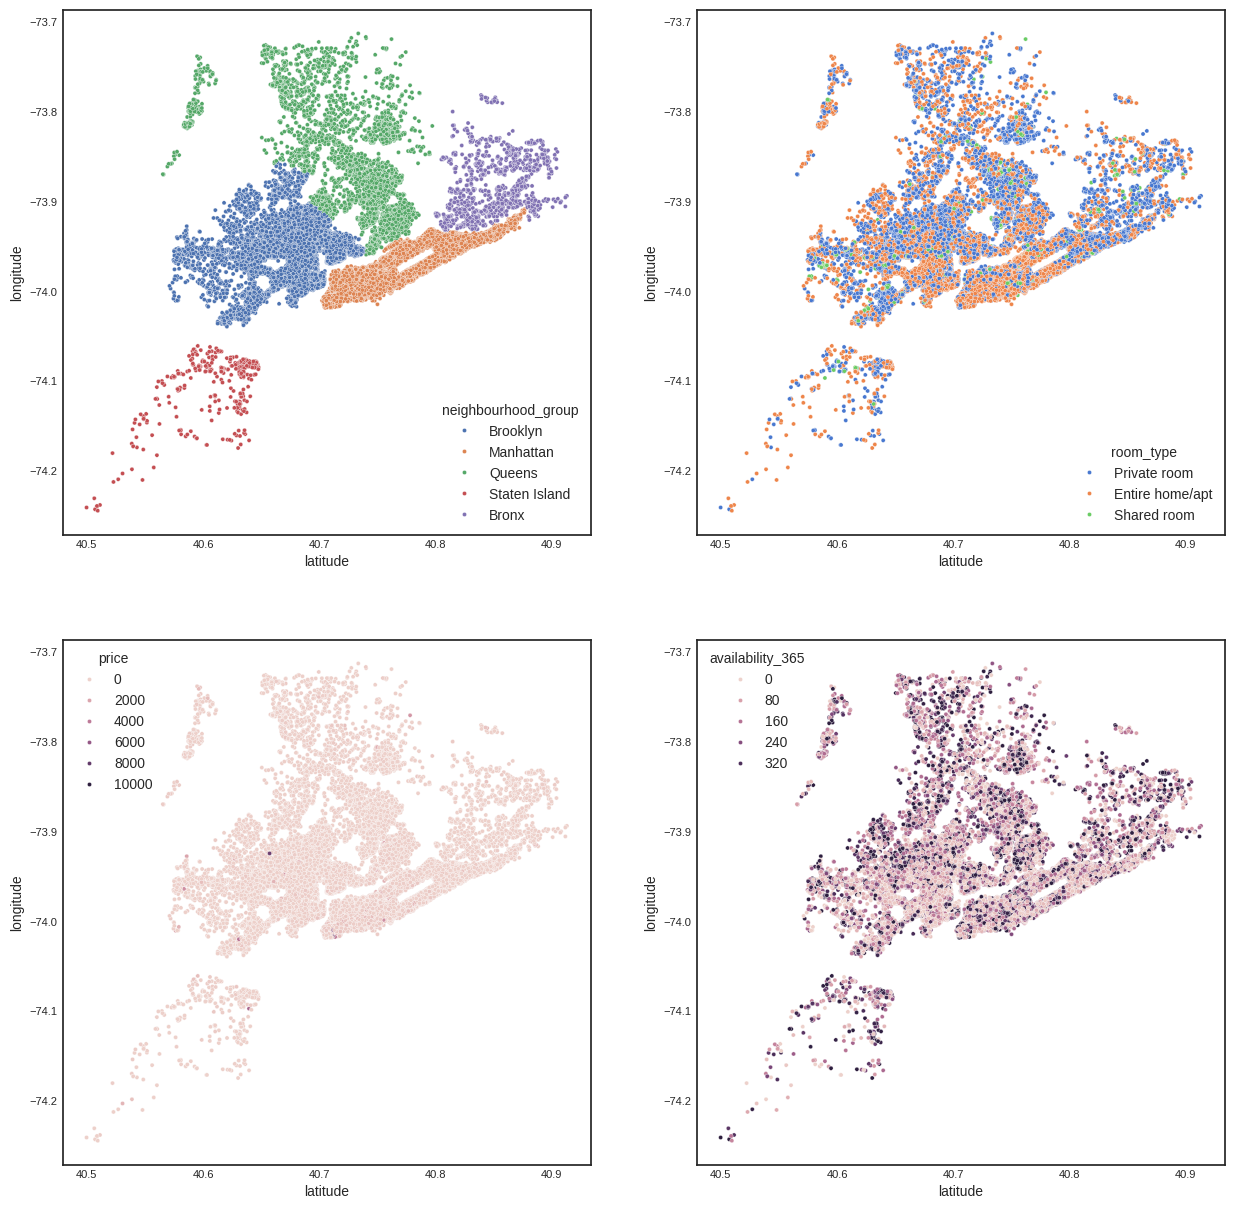

In [46]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude", hue="neighbourhood_group", data=df, palette="deep")

plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude", hue="room_type", data=df, palette="muted")

plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude", hue="price", data=df)

plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=df)
plt.show()

* There are very less number of people who prefers shared room,and in Staten Island many prefers Entire home/apartment.

* The price range in Manhattan are pretty high whereas the prices in Staten Island are low even most of them prefer Entire home/ apartment.

#Q1 What are the neighborhoods that FLH needs to target?

Identifying neighborhoods with the highest demand can help FLH focus its marketing and expansion efforts in areas that are most likely to attract customers.

Targeting neighborhoods with the highest number of listings can help FLH focus marketing efforts where there is already a high demand. Investing in these areas with promotions and better services can further attract more customers, thereby increasing revenue.

In [47]:
#Analyze the 'neighbourhood' and 'neighbourhood_group' columns to identify the neighborhoods that FLH needs to target.
# Group by neighbourhood_group and neighbourhood, then count the occurrences
neighbourhood_counts = df.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='count')

# Sort by count in descending order to identify the most frequent neighbourhoods
neighbourhood_counts = neighbourhood_counts.sort_values(by='count', ascending=False)

# Assign the result to the output variable
neighbourhood_counts.head(10)

,neighbourhood_group,neighbourhood,count
93,Brooklyn,Williamsburg,3920
50,Brooklyn,Bedford-Stuyvesant,3714
105,Manhattan,Harlem,2658
58,Brooklyn,Bushwick,2465
124,Manhattan,Upper West Side,1971
106,Manhattan,Hell's Kitchen,1958
100,Manhattan,East Village,1853
123,Manhattan,Upper East Side,1798
65,Brooklyn,Crown Heights,1564
112,Manhattan,Midtown,1545


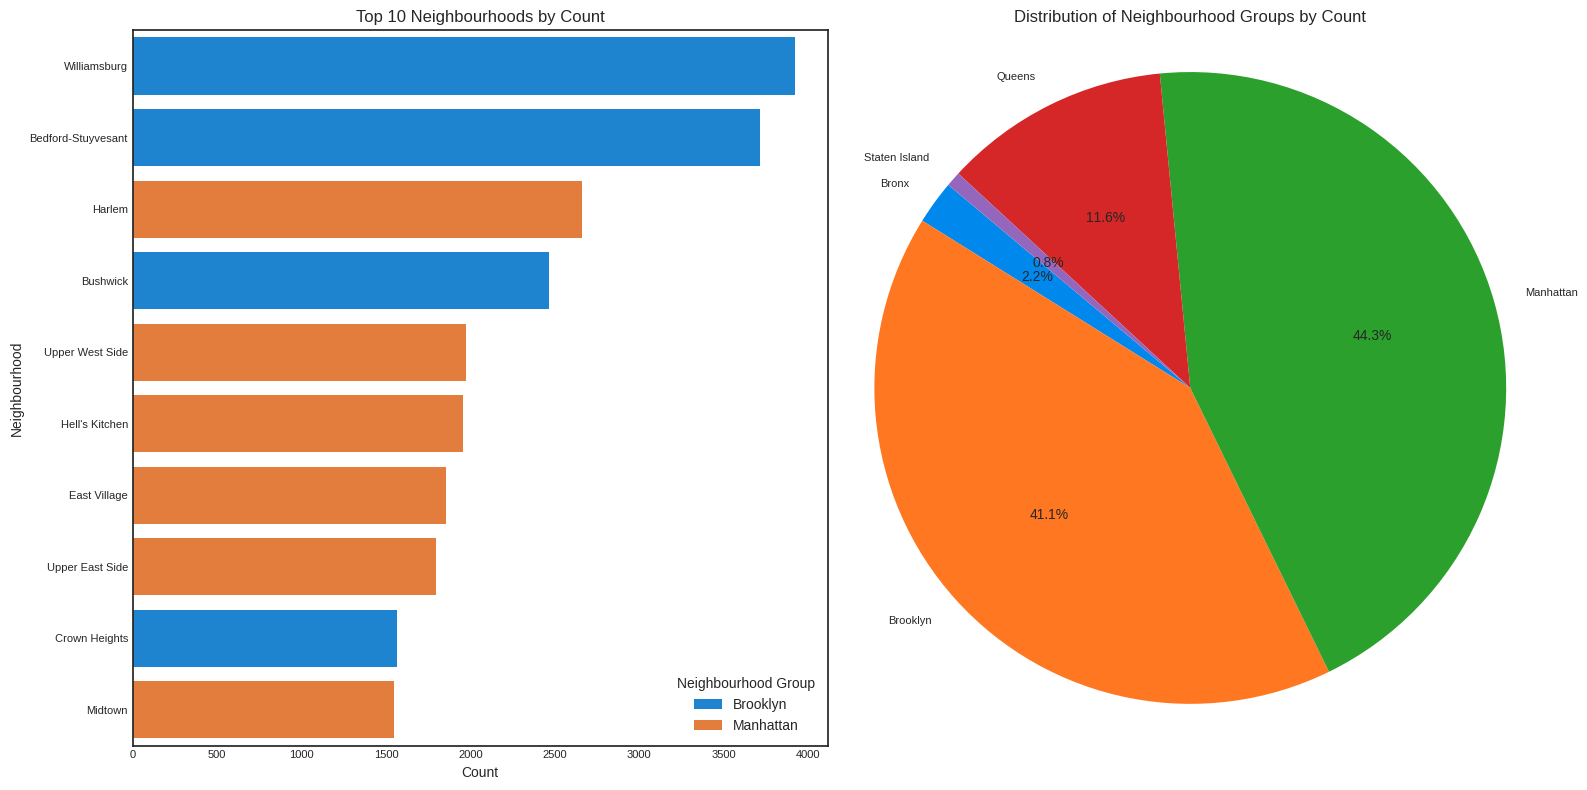

In [48]:
# Filter top 10 neighbourhoods
top_neighbourhoods = neighbourhood_counts.head(10)

# Calculate neighbourhood group counts
neighbourhood_group_counts = df.groupby('neighbourhood_group').size().reset_index(name='count')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for top 10 neighbourhoods
sns.barplot(x='count', y='neighbourhood', hue='neighbourhood_group', data=top_neighbourhoods, dodge=False, ax=ax1)
ax1.set_title('Top 10 Neighbourhoods by Count')
ax1.set_xlabel('Count')
ax1.set_ylabel('Neighbourhood')
ax1.legend(title='Neighbourhood Group')

# Pie chart for neighbourhood groups
ax2.pie(neighbourhood_group_counts['count'], labels=neighbourhood_group_counts['neighbourhood_group'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Neighbourhood Groups by Count')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()

Target Neighborhoods for FLH

* High Priority Neighborhoods: Based on the data, FLH should focus on neighborhoods with the highest listing counts. The top neighborhoods are:

* 85 % of the listing are Manhattan and Brooklyn
neighbourhood_group

* Brooklyn: Williamsburg (3920), Bedford-Stuyvesant (3714), Bushwick (2465)
Manhattan: Harlem (2658), Upper West Side (1971)

These areas have demonstrated high customer demand and should be targeted for marketing and property acquisition efforts.

# Q2 What are the pricing ranges preferred by FLH customers?




Understanding preferred pricing ranges helps FLH set competitive prices that attract customers.

In [49]:
#Analyze the 'price' column to determine the pricing ranges preferred by FLH customers.
# Define price ranges
bins = [0, 50, 100, 150, 200, 300, 500, 10000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-300', '301-500', '501+']

# Create a new column for price ranges
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Group by price range and count the number of listings in each range
price_range_counts = df['price_range'].value_counts().sort_index().reset_index()
price_range_counts.columns = ['price_range', 'count']

price_range_counts

,price_range,count
0,0-50,5027
1,51-100,16850
2,101-150,10033
3,151-200,7200
4,201-300,5867
5,301-500,2683
6,501+,1232


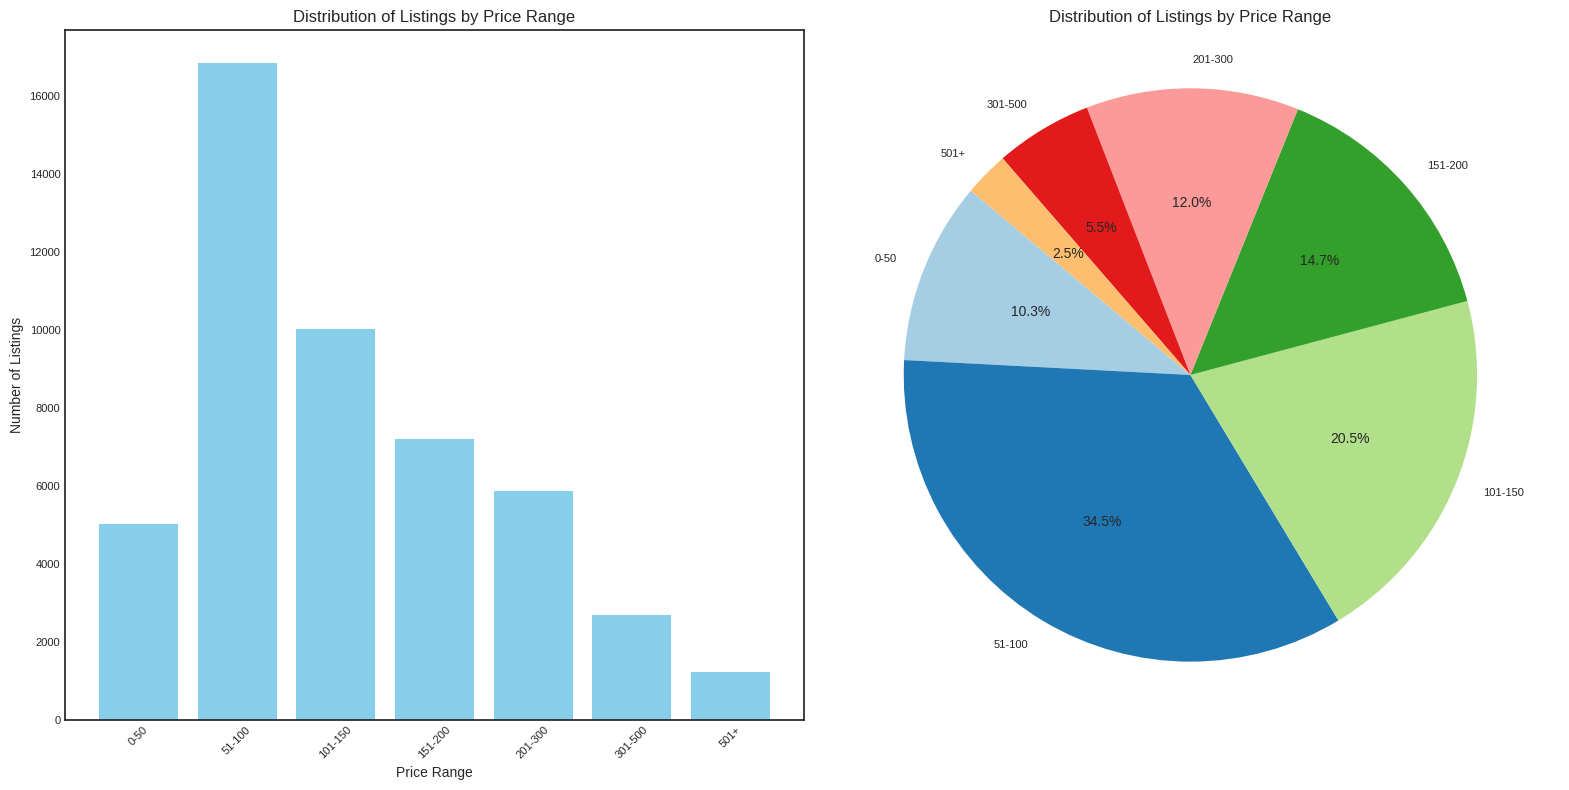

In [50]:
# Plotting the bar chart and pie chart as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart
ax1.bar(price_range_counts['price_range'], price_range_counts['count'], color='skyblue')
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Number of Listings')
ax1.set_title('Distribution of Listings by Price Range')
ax1.set_xticks(price_range_counts['price_range'])
ax1.set_xticklabels(price_range_counts['price_range'], rotation=45)

# Pie chart
ax2.pie(price_range_counts['count'], labels=price_range_counts['price_range'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(price_range_counts))))
ax2.set_title('Distribution of Listings by Price Range')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()

Preferred Pricing Ranges by FLH Customers
* The data shows that the majority of FLH customers prefer prices between $50 and $150 per night, with the most popular price point being $100 per night.

* Around 15% of customers are willing to pay between $150 and $200.

* Entire home/apt listings have the highest number of listings in this price range, followed by private rooms and then shared rooms.
* '$51-100': This range has the highest count of bookings (16850), indicating strong preference.

* '$101-150': Also popular, with 10033 bookings.

Focusing on properties within these price ranges could maximize revenue.

# Q3 What are the types of properties that are most successful and least successful for FLH?



Analyze the 'room_type' and 'number_of_reviews' columns to identify the types of properties that are most successful and least successful for FLH.

In [51]:
room_type_reviews = df.groupby('room_type')['number_of_reviews'].agg(['count']).reset_index()

# Rename columns for clarity
room_type_reviews.columns = ['room_type', 'count_of_number_of_reviews']

room_type_reviews.head()

,room_type,count_of_number_of_reviews
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


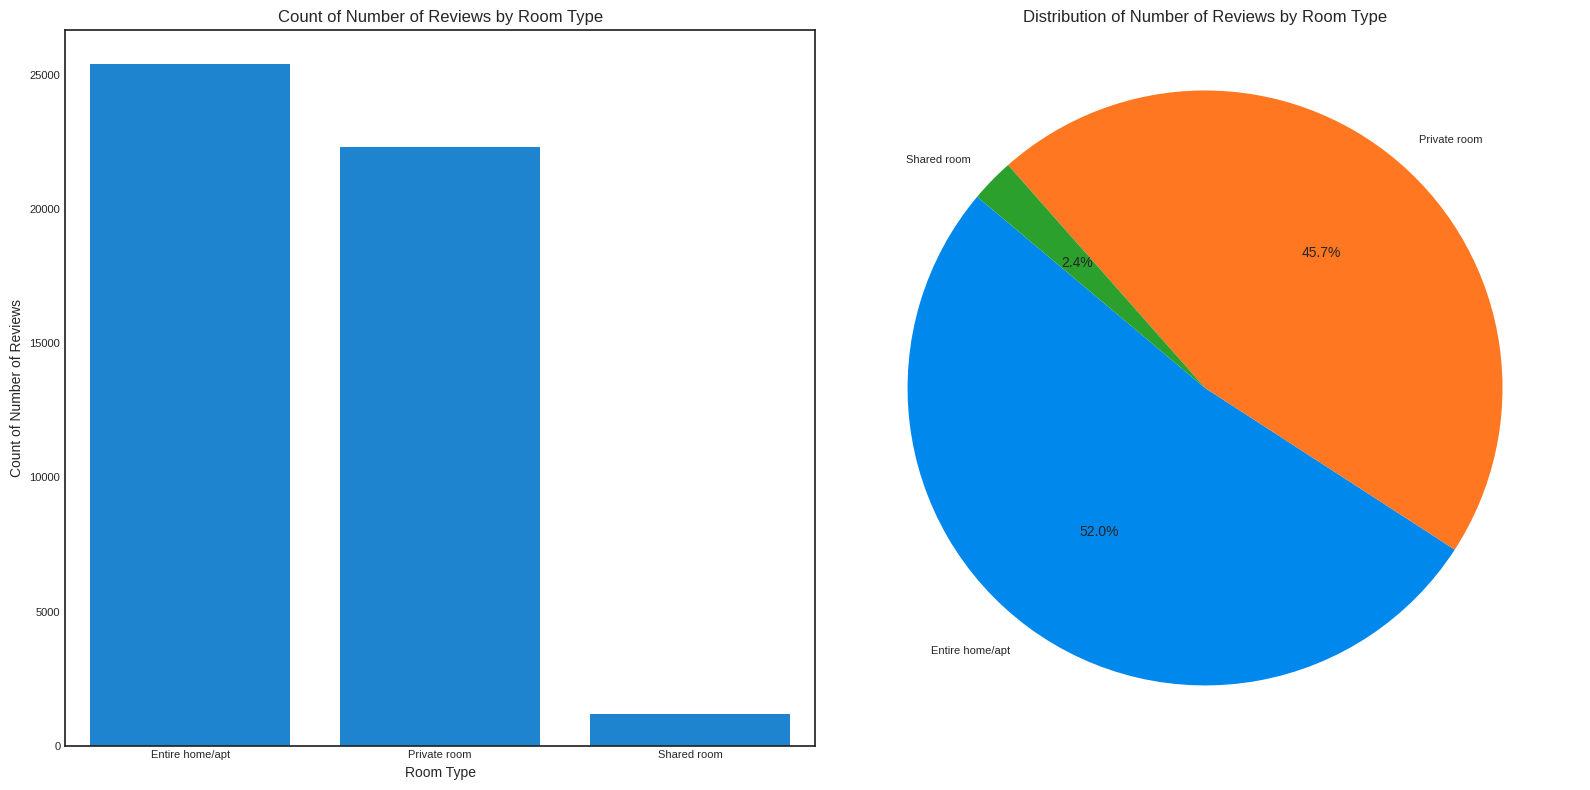

In [52]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot
sns.barplot(x='room_type', y='count_of_number_of_reviews', data=room_type_reviews, ax=ax1)
ax1.set_title('Count of Number of Reviews by Room Type')
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Count of Number of Reviews')

# Pie chart
ax2.pie(room_type_reviews['count_of_number_of_reviews'], labels=room_type_reviews['room_type'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Number of Reviews by Room Type')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()

* Identifying the most successful property types allows FLH to prioritize these in marketing and investment.
Most and Least Successful Property Types
* Most Successful:

    Entire home/apt	have the highest count of number of reviews (25409), suggesting high customer satisfaction and repeat bookings.

* Least Successful:

    Shared Rooms show the lowest count of number of reviews (1160) indicating lower popularity or satisfaction.

# Q4 What are customers looking for most in their stays with FLH?



In [53]:
result = df.groupby(['neighbourhood_group','room_type']).agg({
        'number_of_reviews': 'sum'

    }).reset_index()

# Rename columns for clarity
result.columns = ['Neighbourhood_group','Room Type', 'sum of Reviews']

result

,Neighbourhood_group,Room Type,sum of Reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


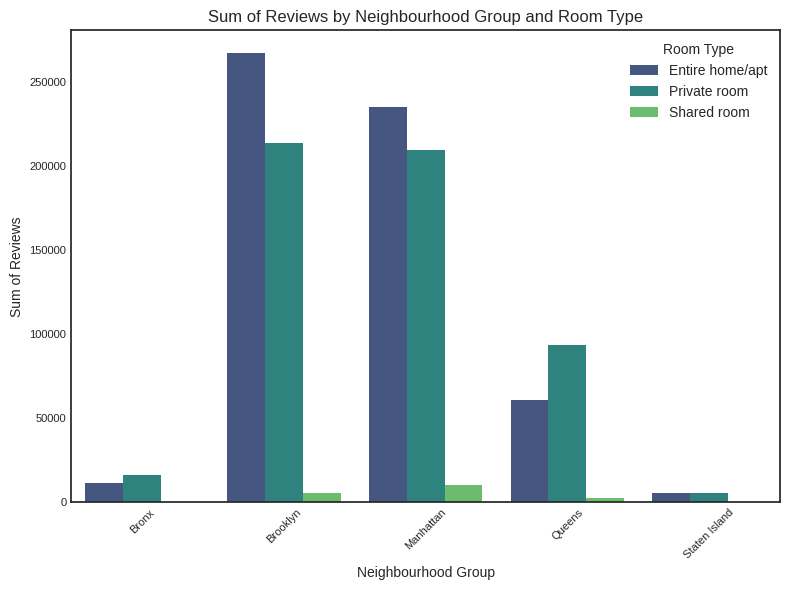

In [54]:
# Plotting using seaborn
result.columns = ['Neighbourhood_group','Room Type', 'sum of Reviews']

plt.figure(figsize=(8, 6))
sns.barplot(x='Neighbourhood_group', y='sum of Reviews', hue='Room Type', data=result, palette='viridis')
plt.title('Sum of Reviews by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Sum of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Neighborhood Group Popularity**:
- Brooklyn and Manhattan have the highest total number of reviews.
- Queens has a noticeable but lower number of reviews compared to Brooklyn and Manhattan.
- Bronx and Staten Island have the lowest number of reviews.

**Room Type Preferences**:
- Entire home/apt consistently has the highest number of reviews, making it the most popular room type.
- Private rooms are also popular, especially in Brooklyn and Manhattan.
- Shared rooms have the fewest reviews, indicating they are the least preferred.

**Comparison Between Neighborhoods**:
- In Brooklyn and Manhattan, reviews for Entire home/apt and Private rooms are close, with Entire home/apt leading.
- In Queens, Private rooms have more reviews than Entire home/apt, which is unique compared to other neighborhoods.

Most of the properties are offering either a Private room or the Entire home/apt, there are very few properties which are offering a Shared room. The reason for this can be that most of the tourists or visitors want privacy and prefer either a private room or to have the entire home/apt for themselves for their convenience.

Queens shows a relatively higher interest in private rooms, which could be an opportunity for targeted marketing and improvements in that segment.

#Q5 What attributes do the hosts have that FLH should target to add to their service to increase revenue?



Analyze the 'host_name', 'host_id', and 'calculated_host_listings_count' columns to identify attributes of hosts that FLH should target to add to their service to increase revenue.

In [55]:
# Convert relevant columns to numeric types
df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')

# Group by host_id and calculate mean number of reviews and total listings count
grouped = df.groupby(['host_id','host_name']).agg({
        'calculated_host_listings_count': 'count',
        'number_of_reviews': 'sum'
    }).reset_index()

# Rename columns for clarity
grouped.columns = ['host_id', 'host_name','total_listings_count', 'total_number_of_reviews']

# Sort by total_listings_count and average_number_of_reviews
output = grouped.sort_values(by=['total_listings_count', 'total_number_of_reviews'], ascending=False)

output.head(10)

,host_id,host_name,total_listings_count,total_number_of_reviews
34646,219517861,Sonder (NYC),327,1281
29407,107434423,Blueground,232,29
19574,30283594,Kara,121,65
31079,137358866,Kazuya,103,87
14436,16098958,Jeremy & Laura,96,138
12806,12243051,Sonder,96,43
25662,61391963,Corporate Housing,91,417
17091,22541573,Ken,87,55
33868,200380610,Pranjal,65,1
9732,7503643,Vida,52,242


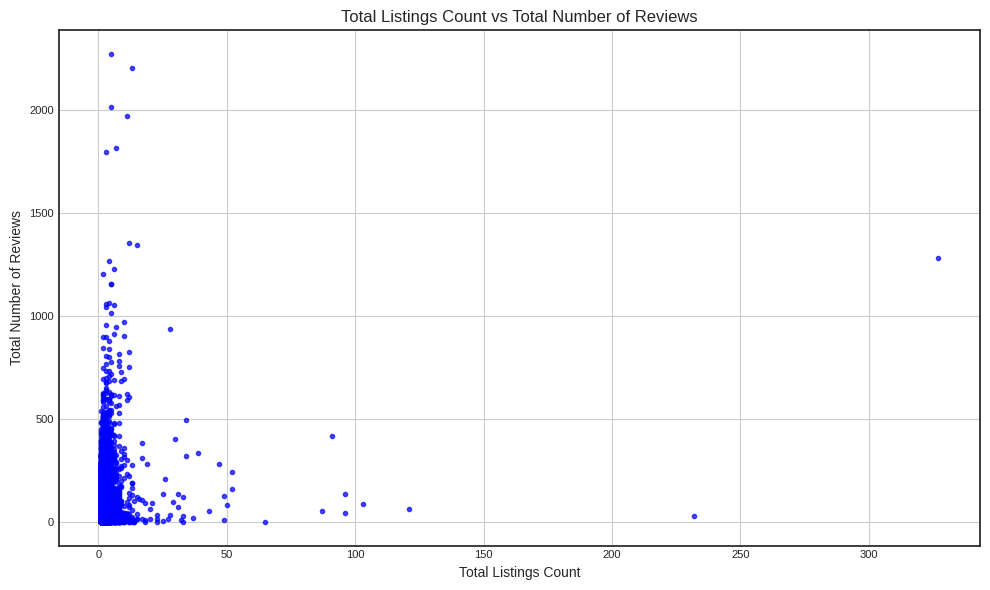

In [56]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(output['total_listings_count'], output['total_number_of_reviews'], color='blue', alpha=0.7)
plt.title('Total Listings Count vs Total Number of Reviews')
plt.xlabel('Total Listings Count')
plt.ylabel('Total Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

Attributes of Hosts to Target for Increasing Revenue
* Hosts with High Listing Counts: Hosts like Sonder (NYC)	 (327 listings) and Blueground (232 listings) manage a large number of properties, indicating experience and capability in handling multiple listings.
* Focus on Experienced Hosts: Targeting hosts who manage multiple listings effectively can help ensure a consistent, quality experience for FLH customers, potentially increasing bookings and revenue.
* Identifying the top hosts is important as it can lead to collaborations, recognition, and potential incentives for these hosts. Recognizing and rewarding top hosts could encourage them to continue providing exceptional service, contributing to positive customer experiences and loyalty.

#Q6 How to get unpopular properties more traction?



In [57]:
# Filter properties with low number of reviews
low_review_properties = df[df['number_of_reviews'] < 10]

# Analyze the availability of these low review properties
availability_analysis = low_review_properties.groupby('availability_365').size().reset_index(name='count')

# Sort by availability to see the distribution
availability_analysis = availability_analysis.sort_values(by='availability_365')

# Assign the result to the output variable
output = availability_analysis.head(10)
output

,availability_365,count
0,0,14164
1,1,216
2,2,138
3,3,150
4,4,121
5,5,196
6,6,128
7,7,121
8,8,121
9,9,96


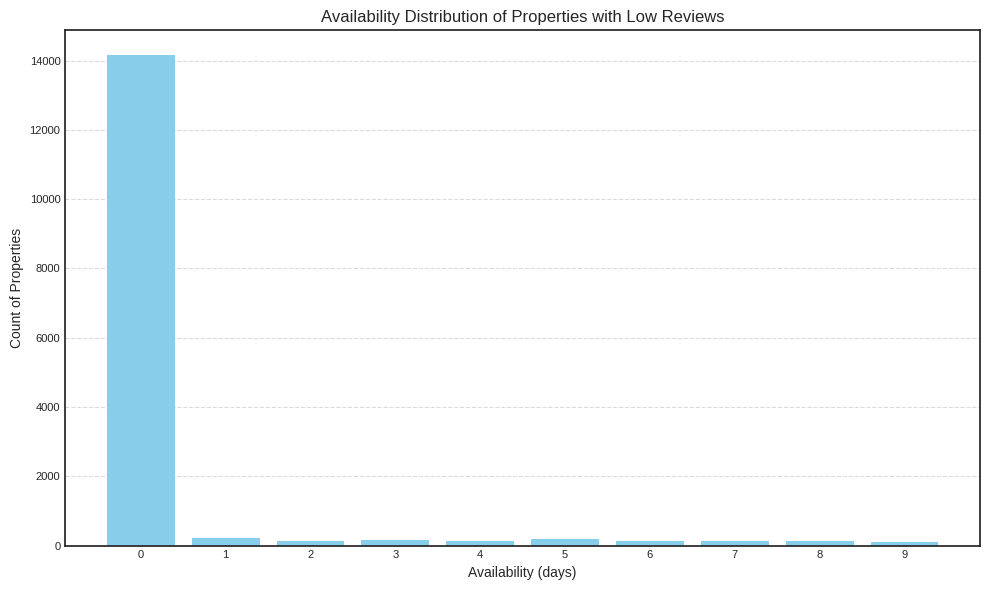

In [58]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(output['availability_365'], output['count'], color='skyblue')
plt.title('Availability Distribution of Properties with Low Reviews')
plt.xlabel('Availability (days)')
plt.ylabel('Count of Properties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(output['availability_365'])
plt.tight_layout()
plt.show()

1. **Highly Available Properties**: A significant number of properties (14,164) have an availability of 0 days, indicating they may not be available for rental throughout the year. This suggests these properties might have limited availability or are not actively rented out.

2. **Limited Availability**: As availability days increase from 1 to 9, the number of properties decreases, indicating that fewer properties have higher availability throughout the year. This highlights variability in rental availability among these properties.

3. **Seasonal or Periodic Availability**: The distribution shows peaks and valleys, suggesting that some properties may be available only during specific seasons or periods. This variability in availability can impact rental income potential across different times of the year.

4. **Potential Impact on Revenue**: Properties with higher availability (closer to 365 days) have the potential to generate more revenue if effectively managed. Properties with lower availability may require adjustments in pricing or marketing strategies to optimize revenue.

5. **Operational Insights**: This analysis can guide operational decisions such as adjusting cleaning schedules, implementing pricing strategies tailored to peak and off-peak periods, and forecasting revenue based on availability trends. Understanding these patterns helps in optimizing rental management and maximizing revenue from the properties.

To improve:
 - Targeted Marketing: Focus marketing efforts on specific neighborhoods and room types that are identified as unpopular to boost their visibility.
 - Pricing Strategy: Review and adjust pricing based on the average prices of similar properties in the same neighborhood to ensure competitiveness.
 - Improving Property Features: Enhance the amenities and features of the properties based on feedback or common features of more popular properties.
 - Optimizing Listing Descriptions: Use attractive and clear descriptions, high-quality photos, and update them regularly to attract more interest.


### Conclusion
 *  **Price Optimization:**
   - Adjust pricing strategies for unpopular properties. This could involve offering competitive pricing relative to similar properties or experimenting with discounts and promotions to attract more bookings.

 **Targeted Marketing Campaigns:**
   - Develop targeted marketing campaigns that highlight the unique selling points of unpopular properties (e.g., unique architecture, proximity to attractions) to attract specific customer segments.

 **Improvement Initiatives:**
   - Work with property hosts to implement improvements based on customer feedback. This could include upgrading amenities, improving cleanliness standards, or enhancing customer service responsiveness.

 **Review and Rating Management:**
   - Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially.
   
   Encourage satisfied customers to leave positive reviews and ratings for unpopular properties. Positive reviews can significantly improve trust and booking rates for these properties.

 **Host Engagement and Support:**
    - Provide training and support to property hosts on best practices for improving property attractiveness and guest satisfaction. Engaged hosts are more likely to implement changes that lead to increased bookings.

By systematically addressing these areas through data analysis and targeted strategies, FLH can effectively increase the visibility, attractiveness, and ultimately the revenue of its less popular properties.

















# CONNECTING MYSQL

In [62]:
#loading the data into sql server using replace option
import sqlalchemy as sal
#!pip install sqlalchemy
!pip install pymysql
from sqlalchemy import create_engine

import pandas as pd

hostname = 'localhost'
username = 'root'
password = 'MYSQLpassword03!!'
port = 3306
database = 'flh'

In [ ]:
print(('mysql+pymysql://' +username+':'+password+'@'+hostname+':'+str(port)+'/'+database))
engine = create_engine('mysql+pymysql://' +username+':'+password+'@'+hostname+':'+str(port)+'/'+database)

conn = engine.connect()

# Check connection (this will print the connection object if successful)
print(conn)

In [ ]:
#load the data into sql server using append option
df.to_sql('df_flh', con=conn , index=False, if_exists = 'replace')